### 12 - Estimation and Confidence Interval

Source: https://www.britannica.com/science/statistics/Estimation-of-a-population-mean

The most fundamental point and interval estimation process involves the estimation of a population mean. Suppose it is of interest to estimate the population mean, μ, for a quantitative variable. Data collected from a simple random sample can be used to compute the sample mean, x̄, where the value of x̄ provides a point estimate of μ.

When the sample mean is used as a point estimate of the population mean, some error can be expected owing to the fact that a sample, or subset of the population, is used to compute the point estimate. The absolute value of the difference between the sample mean, x̄, and the population mean, μ, written |x̄ − μ|, is called the sampling error. Interval estimation incorporates a probability statement about the magnitude of the sampling error. The sampling distribution of x̄ provides the basis for such a statement.

Statisticians have shown that the mean of the sampling distribution of x̄ is equal to the population mean, μ, and that the standard deviation is given by σ/Square root of√n, where σ is the population standard deviation. The standard deviation of a sampling distribution is called the standard error. For large sample sizes, the central limit theorem indicates that the sampling distribution of x̄ can be approximated by a normal probability distribution. As a matter of practice, statisticians usually consider samples of size 30 or more to be large.



In [40]:
# Import useful libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,12)     # set global parameter to increase the plot size. Default size is too small

In [41]:
# load 2017-2018 college scorecard data
# Again, we only load the needed columns

#Data_URL="https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv"
col_names = ["ST_FIPS", "INSTNM","CONTROL", "TUITIONFEE_IN"]
#df=pd.read_csv(Data_URL,usecols=col_names)
df = pd.read_csv("MERGED2017_18_PP.csv", usecols=col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 4 columns):
INSTNM           7112 non-null object
CONTROL          7112 non-null int64
ST_FIPS          7112 non-null int64
TUITIONFEE_IN    4021 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 222.4+ KB


In [42]:
# ST_FIPS representing states and CONTROL representing institution ownership types. 
# So they should be categorical variable even the value are numbers
# convert them from integer type to string type

df["ST_FIPS"] = df["ST_FIPS"].astype(str)
df["CONTROL"] = df["CONTROL"].astype(str)

In [43]:
# Find out the colleges that have zero tuition

df[df["TUITIONFEE_IN"] == 0]

,INSTNM,CONTROL,ST_FIPS,TUITIONFEE_IN


In [44]:
# Drop the colleges with zero tuition

df = df[df["TUITIONFEE_IN"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 7111
Data columns (total 4 columns):
INSTNM           7112 non-null object
CONTROL          7112 non-null object
ST_FIPS          7112 non-null object
TUITIONFEE_IN    4021 non-null float64
dtypes: float64(1), object(3)
memory usage: 277.8+ KB


In [45]:
# Find out how many colleges having missing tuition

df["TUITIONFEE_IN"].isna().sum()

3091

In [29]:
# Drop these colleges with missing tuition from the dataframe

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 6804
Data columns (total 4 columns):
INSTNM           3865 non-null object
CONTROL          3865 non-null object
ST_FIPS          3865 non-null object
TUITIONFEE_IN    3865 non-null float64
dtypes: float64(1), object(3)
memory usage: 151.0+ KB


Finally, we have a population of 4,024 colleges. 

We will now proceed to take a random sample of colleges and use the sample mean as an estimator for the population mean. Since the sample mean is only the approximation of the population mean, we would like to find out our confidence level and confidence interval of our estimate and the margin of errors.

The formula for calculating standard deviation of a sample is:

 √(∑(xi - x(bar))^2) /n-1)  

The term n-1 is called the degrees of freedom, meaning "number of independent variables - number of parameters estimated".
in this case the mean is being estimated.

The formula for calculating standard deviation of a population is:

√(∑((xi - µ )^2) /n) 

The Standard Error (SE) = Standard Deviation / Square Root of Sample Size

SE is used to measure the sampling error.

In [30]:
# Random sample of colleges
SAMPLE_SIZE = 50         # This variable will be used through out the rest of cells

df_sample = df.sample(SAMPLE_SIZE)
sample_mean = df_sample["TUITIONFEE_IN"].mean()
sample_mean                   

15829.48

In [31]:
#### Let's calculate the sample standard deviation the hard way

tuition_list = list(df_sample["TUITIONFEE_IN"])
degree_of_freedom = SAMPLE_SIZE - 1
variance = 0
for tuition in tuition_list:
    variance += (tuition - sample_mean)**2
sample_std = math.sqrt(variance/degree_of_freedom)
round(sample_std, 2)

13394.63

In [32]:
#### Let's calculate the sample standard deviation easy way using Pandas

sample_std = df_sample["TUITIONFEE_IN"].std()
round(sample_std, 2)

13394.63

#### Let's calculate the sample standard deviation easy way using Numpy

Notes:

Delta Degrees of Freedom (DDOF): the divisor used in the calculation is N - ddof, where N represents the number of observations. By default, ddof is zero.

In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.


In [33]:
sample_std = np.std(df_sample["TUITIONFEE_IN"], ddof=1)
round(sample_std, 2)

13394.63

### Confidence Intervals 

We will use the following chracteristics of a normal distribution:

- 68% of values are within 1 standard deviation of the mean, 𝜇±𝜎
- 95% of values are within 2 standard deviations of the mean, 𝜇±2𝜎
- 99.7% of values are within 3 standard deviations of the mean, 𝜇±3𝜎 (This is where the famous 6 sigma came from)

In [34]:
# let's calculate the standard error first 
# Since we assume we don't know the population standard deviation, we use sample standard deviation as an estimate

std_err = sample_std / math.sqrt(SAMPLE_SIZE)       # standard error
std_err

1894.286322180467

In [35]:
# Calculate 68% Confidence Interval (CI) - one standard error from the population mean
# 68% chances the population mean is within the sample_mean (+ or -) the standard error (SE)

LCL_68 = sample_mean -  std_err
UCL_68 = sample_mean +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  13935.19
Upper confidence limit at 68% confidence level =  17723.77


In [36]:
# Calculate 95% Confidence Interval (CI) - one standard error from the population mean
# 90% chances the population mean is within the sample_mean + or - 2 * the standard error (SE)

LCL_95 = sample_mean -  2 * std_err
UCL_95 = sample_mean +  2 * std_err
print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))


Lower confidence limit at 95% confidence level =  12040.91
Upper confidence limit at 95% confidence level =  19618.05


In [37]:
# Calculate 99.7% Confidence Interval (CI) - one standard error from the population mean
# 99.7% chances the population mean is within the sample_mean + or - 3 * the standard error (SE)

LCL_997 = sample_mean -  3 * std_err
UCL_997 = sample_mean +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  10146.62
Upper confidence limit at 99.7% confidence level =  21512.34


### The End!


#### Now, the Bonus Follows: Let's compare the tuition of different types of institutions using Boxplot

In [38]:
# Transform the cryptic numbers to explicit lables. 
def get_ownership(control):
    if control == "1":
        return "Public"
    elif control =="2":
        return "Private nonprofit"
    elif control =="3":
        return "Private for-profit"
    else: 
        return np.nan
    
df["CONTROL"] = df["CONTROL"].apply(get_ownership)
df.sample(10)

,INSTNM,CONTROL,ST_FIPS,TUITIONFEE_IN
162,University of Arkansas Community College Rich ...,Public,5,2880.0
1939,College of Saint Mary,Private nonprofit,31,20350.0
6755,Keweenaw Bay Ojibwa Community College - Wabanu...,Public,26,610.0
4010,Interactive College of Technology-Newport,Private for-profit,21,9530.0
2503,Wingate University,Private nonprofit,37,33166.0
1384,Washington County Community College,Public,23,3722.0
442,San Jose City College,Public,6,1358.0
2276,Nyack College,Private nonprofit,36,25350.0
408,Pitzer College,Private nonprofit,6,54056.0
2765,Tulsa Community College,Public,40,3349.0


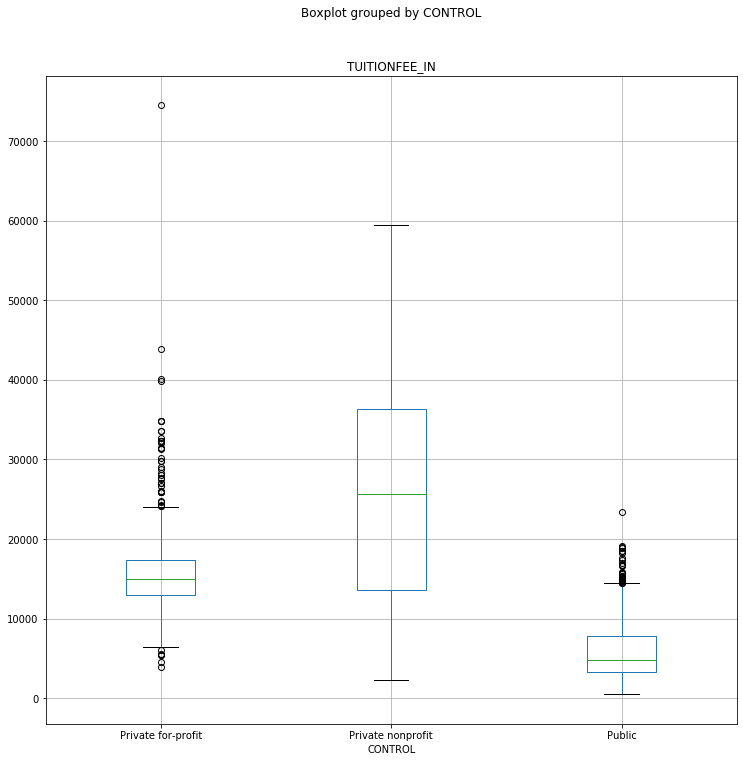

In [39]:
# Display the boxplot by different ownership types

df.boxplot("TUITIONFEE_IN",by="CONTROL")

### The End 